### Fashion MNIST

Este guia usa a base de dados Fashion MNIST que contém 70.000 imagens a preto e branco de 10 categorias diferentes. As imagens apresentam peças de roupa individuais com pouca resolução (28 por 28 píxeis), como podem ser vistas aqui:

![picture](https://drive.google.com/uc?id=14OL9Usm0FjgVQ64lbdPjmBXXs3RHp93-)

Este dataset é dividido em classes, conforme tabela abaixo:

![picture](https://drive.google.com/uc?id=13EC0_CzdrQSraBK9jmAZhtoMPohlCYDG)

Então, dada uma imagem de entrada, essas são nossas possíveis saídas de rótulo.

No total, o conjunto de dados Fashion MNIST contém ** 70.000 ** imagens, o que sem dúvida é suficiente para começarmos. Das 70.000 imagens, usaremos ** 60.000 delas para treinar a rede neural com as outras 10.000 sendo usadas para testar a rede neural **. Lembre-se também de que cada imagem é uma imagem de 28px x 28px, o que significa que existem 784 bytes. E assim, o trabalho seria simplesmente pegar os 784 bytes como entrada e então produzir um dos 10 itens diferentes de roupa que a imagem representa.

![picture](https://drive.google.com/uc?id=16GoYQ3bYXavi8A7sVRAW7xgZVPKsskjh)

<b>Trabalhando com rede neural, NOT deeplearning </b>


![picture](https://drive.google.com/uc?id=19mD8t9I8CpLD6Q5A3Br4-FEHZUgRcxyk)

<b>Como você pode ver, nossa entrada seria uma matriz de comprimento 784 (28x28px). Como a rede neural receberia um vetor como entrada, os 28x28 pixels seriam colocados em uma matriz unidimensional que geraria o vetor com 784 de comprimento. Este processo de conversão de uma imagem 2-D em um vetor 1-D é conhecido como <code> flatenning </code>.</b>
<p>Este é um exemplo de como o código ficaria: <code> tf.keras.layers.Flatten (input_shape = (28, 28, 1)) </code>. A entrada do código seria totalmente conectada à primeira camada densa de nossa rede neural de onde escolhemos utilizar 128 unidades. Este é um exemplo de como o código ficaria: <code> tf.keras.layers.Dense (128, ativação = tf.nn.relu) </code>. Mas qual é a seção <code> tf.nn.relu </code> lá? Não fizemos isso em nossa rede farenheit-celsius? Então, <b> Relu </b> é uma função matemática que adicionamos à nossa Camada Densa. Em essência, é uma pequena extensão matemática para nossa camada densa que permite que nossa rede resolva problemas mais complexos. Significa Unidade Linear Retificada e se parece com isso:

![picture](https://drive.google.com/uc?id=1L-Y6vTOu2wbWNSYfb6nSqWoUnRyiqJny)




<b> codificando</b>

In [1]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

<b>carregando o dataset (tfds.load) </b>

o dataset tem 70.000 imagens em 10 classes.

- O modelo é treinado com o  <code>train_dataset</code>
- o modelo é testado com o  <code>test_dataset</code>


A saída da RNA tem 10 neurônios na camada, e todas apresentam um valor numerico na saida. A saída que apresentar o maior valor numerico vai representar a classe .

#Codificando....

In [4]:
!pip install -q tensorflow tensorflow-datasets matplotlib


In [5]:
from __future__ import absolute_import, division, print_function

#Importing Tensorflow and Tensorflow Datasets

import tensorflow as tf
import tensorflow_datasets as tfds

#Helper Libraries

import math
import numpy as np
import matplotlib.pyplot as plt

#Improve Progress Bar Display

import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(tf.__version__)

2.8.2


In [6]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test'] 

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/fashion_mnist/3.0.1.incomplete85FM4E/fashion_mnist-train.tfrecord*...:   0%|  …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/fashion_mnist/3.0.1.incomplete85FM4E/fashion_mnist-test.tfrecord*...:   0%|   …

Dataset fashion_mnist downloaded and prepared to ~/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"] 

In [ ]:
class_names

###Carregando dataset

In [8]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


<b>Explorando...</b>
Este dataset tem 60.000 imagens de treino e 10.000 de teste, já divididos previamente. e não fossem, teríamos que usar o comando <code>split</code> para dividir o dataset



In [9]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

print("Numero de exemplos de treinamento: {}".format(num_train_examples))
print("Numero de exemplos de teste: {}".format(num_test_examples))

Numero de exemplos de treinamento: 60000
Numero de exemplos de teste: 10000


<b>Pre-Processamento - Normalização</b>

Trabalhar com faizas de valores grandes pode provocar instabilidade no treinamento, assim, normalmente os  dados são normalizados. Aqui, simplesmente foram divididos por 255.
Existem outras normalizações, como:
Xnormalizado= (x- min(x)) / (max(x)-min(x))

Xnormalizado = (x- media(x)) / desviopadrao(x)


In [10]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels


train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

<b>Exibindo uma imagem</b>



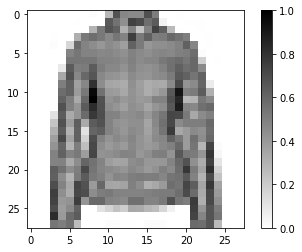

In [11]:
# Apresentando  uma única imagem e removendo a dimensão de cor com reshape


for image, label in test_dataset.take(1):
    break
image = image.numpy().reshape((28,28))


plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

Plotando 25 imagens !

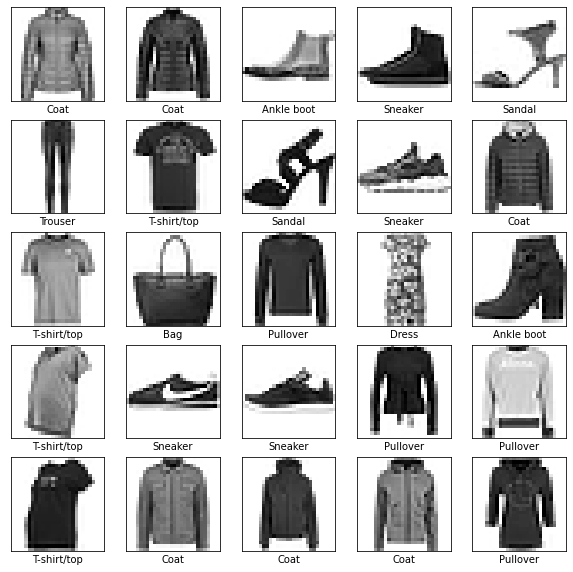

In [12]:
plt.figure(figsize=(10,10))
i = 0

for (image,label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()



# Criando o modelo !
"A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor."

https://keras.io/guides/sequential_model/

## Vamos lembrar que a imagem 28x28 pixels, com 10 saídas.
28 x 28 = 784

In [13]:
mnist_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),   
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

As 3 camadas.

- <b>input</b> <code>tf.keras.layers.Flatten</code> - This layer transforms a 2-d array (matrix) into a 1-D array of 784 (28 x 28). Think of this layer as lining up the images from a square to one, long line. This layer doesn't learn anything; it simply reshapes the data.
- <b>"hidden"</b> <code>tf.keras.layers.Dense</code> - A densly connected layer of 126 neurons. Each neuron (otherwise known as a node) takes input  from all 784 nodes in the previous layer, weighting that input according to hidden parameters which will be learned during training, and outputs a single value to the next layer.
- <b>output</b> <code>tf.keras.layers.Dense</code> This is a 10 node softmax layer with each node representing a class of clothing. As in the previous layer, each node takes input from the 128 nodes in the layer before it, weights that input according to learned parameters, and then outputs a value in the form of [0, 1] which of course, represents the probability of of the image belonging to that class. The sum of all 10 nodes is 1. 

<b>Compilando o modelo</b>
Acrescentando mais dois parâmetros

- Loss function -Um algoritmo para medir o quão longe as saídas do modelo estão da saída desejada. O objetivo do treinamento é a diminuição  dessa métrica.
- Optimizer - Um algoritmo para ajustar os parâmetros internos do modelo para minimizar a perda.
- Metrics - Usado para monitorar as etapas de treinamento e teste. O exemplo a seguir usa precisão, a fração das imagens que são classificadas corretamente:

In [14]:
mnist_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Primeiro, definimos o comportamento de iteração para o conjunto de dados de treinamento:
Repita indefinidamente  usando o parâmetro  dataset.repeat () (o parâmetro epochs descrito abaixo limita por quanto tempo realizamos o treinamento).

O dataset.shuffle (60000) randomiza a ordem dos dados de treinamento, para não viciar o modelo;

E dataset.batch (32) diz ao model.fit para usar lotes de 32 imagens e rótulos ao atualizar as variáveis ​​do modelo.
O treinamento é realizado chamando o método model.fit:

Alimente os dados de treinamento para o modelo usando train_dataset.
O modelo aprende a associar imagens e rótulos.
O parâmetro epochs = 5 limita o treinamento a 5 iterações completas do conjunto de dados de treinamento, portanto, um total de 5 * 60.000 = 300.000 exemplos. 

In [15]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [16]:
history = mnist_model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 14s 4ms/step - loss: 0.4980 - accuracy: 0.8252
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3710 - accuracy: 0.8665
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3337 - accuracy: 0.8777
Epoch 4/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3095 - accuracy: 0.8865
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2990 - accuracy: 0.8903


Como podemos ver, as métricas loss e accuracy são apresentadas, mostrando o treinamento sendo realizado. Após o treinamento (final da 5a epoch) temos loss 29,37%     e accuracy  89,21%.

In [17]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

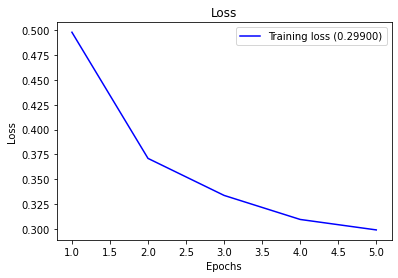

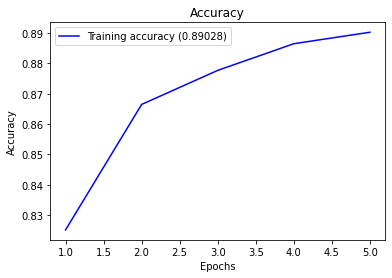

In [18]:
plot_history(history)

<b>Testando nosso modelo</b>
Vamos agora comparar o desempenho do modelo em nosso conjunto de dados de teste. Podemos usar todos os exemplos que temos no conjunto de dados de teste para avaliar a precisão do nosso modelo.

In [ ]:
test_loss, test_accuracy = mnist_model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))

313/313 [==============================] - 1s 4ms/step - loss: 0.3634 - accuracy: 0.8698


Observando nossos dados, a precisão do conjunto de dados de teste é semelhante ao conjunto de dados de trem (87% e 89%). Isso é totalmente esperado, pois o modelo foi treinado em<code> train_dataset\<code>. Quando o modelo utiliza  imagens que não viu antes (neste caso, <code>test_dataset<code>), poderíamos esperar que a precisão tivesse caído um pouco.

<b>Classificando...</b>

com o modelo treinando, podemos aplicar uma entrada e ver qual  a saída foi obtida !

In [ ]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = mnist_model.predict(test_images)

In [ ]:
predictions.shape

(32, 10)

Como era de se esperar, ao apresentar 32 imagens obtida do BATCH_SIZE, teremos 10 saidas para cada uma. QUal é a saída que vai indicar a classe predita ?

In [ ]:
# para a primeira imagem...
predictions[0]

array([1.2530714e-05, 1.0300865e-06, 2.4567699e-02, 1.2968565e-07,
       8.7715870e-01, 1.9003283e-08, 9.8257206e-02, 1.6992633e-08,
       2.6858054e-06, 1.6396669e-08], dtype=float32)

In [ ]:
# a clase predita é aquela associada à saíidada rede com o maior valor
np.argmax(predictions[0])

4

Então nosso modelo classificou a entrada como sendo um casado (coat), ou <code>class_names[4]</code>. podemos ver o respectivo label da imagem 0.

In [ ]:
test_labels[0]

4



---



In [ ]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_labels, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_labels:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f} ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_labels]), color=color)

def plotting_probabilities(i, predictions_array, true_labels):
  predictions_array, true_labels = predictions_array[i], true_labels[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_labels].set_color('blue') 

Vamos apresentar algumas imagens e suas predições. e o label está vermelho, é que foi uma classificação errada

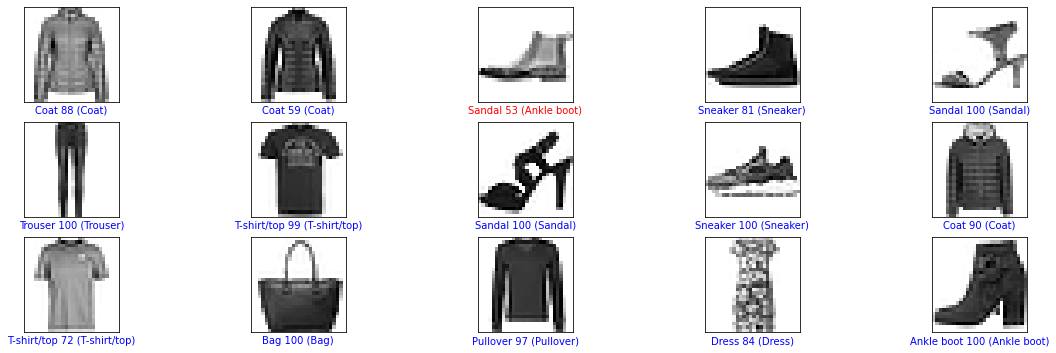

In [ ]:
#Plot the first ____ images, their predicted label, and the true label

num_rows = 3
num_cols = 5

num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  #plt.subplot(num_rows, 2*num_cols, 2*i+2)
  #plotting_probabilities(i, predictions, test_labels)

#Vamos recarregar os dados e , com a rede treinada, plotar nossa matriz de confusão

In [ ]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


In [ ]:
test_dataset.map(normalize)

<MapDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
BATCH_SIZE = 8192 # imagens de teste
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [ ]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  saida = mnist_model.predict(test_images)

In [ ]:
print('Total de imagens de teste: %d'  % int(test_images.size/784))
print(saida.size/10)


Total de imagens de teste: 8192
8192.0


#obtendo a previsão com os valores de teste para o modelo

In [ ]:
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix


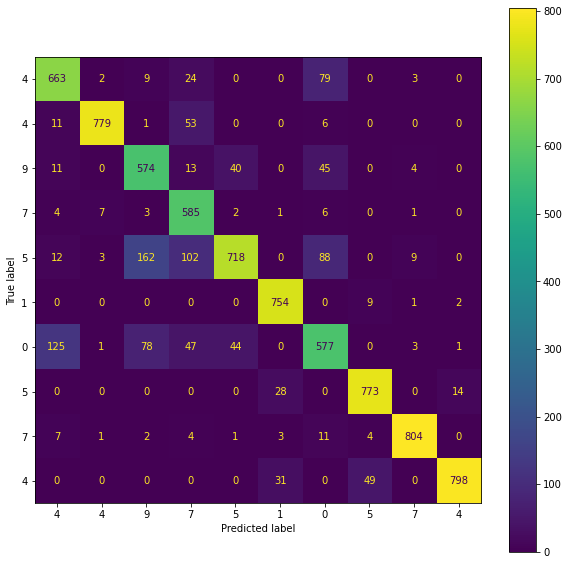

In [ ]:
y_probs = mnist_model.predict(test_images)

#Convert prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

#Confusion matrix
cm=confusion_matrix(y_preds,test_labels)
#Plot
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=test_labels)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax);

